In [5]:
import pandas as pd
import statsmodels.api as stats
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('FiveRing.csv')
df.head()

,ring,x,y
0,0,0.000000,1.000000
1,0,0.001877,1.061234
2,0,0.001877,0.938766
3,0,0.002810,1.074915
4,0,0.002810,0.925085


In [8]:
dfi= stats.add_constant(df,prepend=True)
dfi.head()
y=dfi[['ring']]
x=dfi[['const','x','y']]
y.head()
x.head()

C:\Users\Sanjeev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


,const,x,y
0,1.0,0.000000,1.000000
1,1.0,0.001877,1.061234
2,1.0,0.001877,0.938766
3,1.0,0.002810,1.074915
4,1.0,0.002810,0.925085


In [9]:
logit =stats.MNLogit(y,x)
logfit=logit.fit(method='newton',full_output=True,maxiter=1000,tol=1e-8)
parameter=logfit.params

Optimization terminated successfully.
         Current function value: 1.120803
         Iterations 7


In [10]:
parameter.round(4)

,0,1,2,3
const,-4.4355,0.1877,-2.7014,-8.7026
x,2.9533,-1.4679,1.4554,4.4382
y,0.0007,0.7201,0.6947,0.7194


In [11]:
predProb=logfit.predict(x)
targetClass=[0,1,2,3,4]
nMissClass=0
predClass=np.zeros(x.shape[0])
for i in range(x.shape[0]):
    j=np.argmax(predProb.iloc[i,:])
    predClass[i]=targetClass[j]
    if (predClass[i] != y.iloc[i,0]):
        nMissClass +=1
print(nMissClass/x.shape[0])

C:\Users\Sanjeev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0.5880059970014992


In [12]:
predProb
RASE=0
for i in range(x.shape[0]):
    if y.iloc[i,0]==0:
        RASE += ((1-predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                 (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
    elif y.iloc[i,0]==1:
        RASE += ((predProb.iloc[i,0])**2 + (1-predProb.iloc[i,1])**2 + 
                 (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
    elif y.iloc[i,0]==2:
        RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                 (1-predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
    elif y.iloc[i,0]==3:
        RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                 (predProb.iloc[i,2])**2 +(1-predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
    elif y.iloc[i,0]==4:
        RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                 (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(1-predProb.iloc[i,4])**2)
RASE =np.sqrt(RASE/(2*x.shape[0]))
print(round(RASE,4))   

0.5582


In [13]:
targetClass=[0,1,2,3,4]
predClassdraw=[]
for i in range(x.shape[0]):
    j=np.argmax(predProb.iloc[i,:])
    predClassdraw.append(targetClass[j])
#predClassdraw
#plt.figure(figsize=(6,6))
#plt.plot()

C:\Users\Sanjeev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


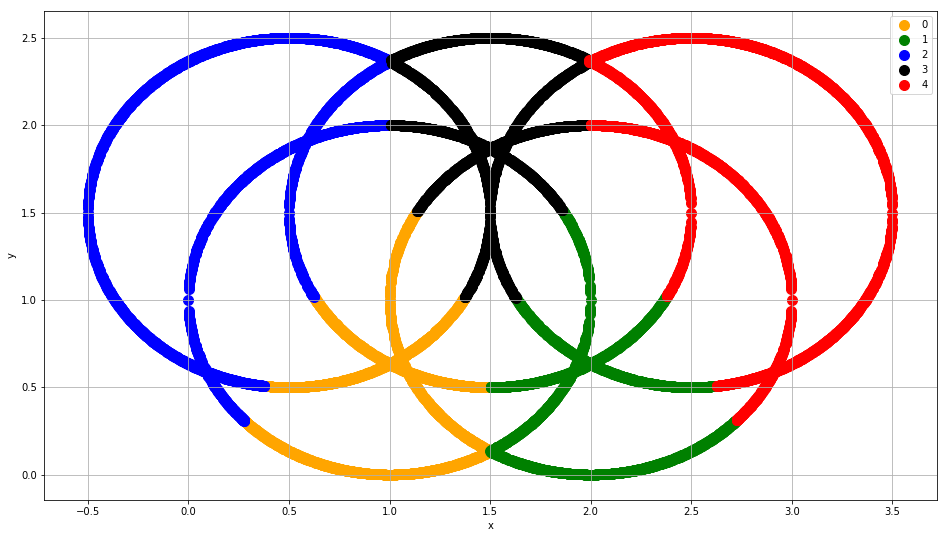

In [14]:
color=['orange','green','blue','black','red']
plt.figure(figsize=(16,9))
i0=np.where(predClass==0)
plt.scatter(df.x.iloc[i0[0]],df.y.iloc[i0[0]],c=color[0],label=0,s=100)
i1=np.where(predClass==1)
plt.scatter(df.x.iloc[i1[0]],df.y.iloc[i1[0]],c=color[1],label=1,s=100)
i2=np.where(predClass==2)
plt.scatter(df.x.iloc[i2[0]],df.y.iloc[i2[0]],c=color[2],label=2,s=100)
i3=np.where(predClass==3)
plt.scatter(df.x.iloc[i3[0]],df.y.iloc[i3[0]],c=color[3],label=3,s=100)
i4=np.where(predClass==4)
plt.scatter(df.x.iloc[i4[0]],df.y.iloc[i4[0]],c=color[4],label=4,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis(aspect='equal')
plt.legend()
plt.show()


In [15]:
def sample_wr (inData):
    n = len(inData)
    outData = np.empty((n,1))
    for i in range(n):
        j = int(random.random() * n)
        outData[i] = inData[j]
    return outData

In [16]:



def bootstrap_classMNLog (x_train, y_train, nB):
        x_index = x_train.index
        nT = len(y_train)
        outProb = np.zeros((nT,5))
        outThreshold = np.zeros((nB, 1))

        # Initialize internal state of the random number generator.
        random.seed(20190430)

        for iB in range(nB):
            bootIndex = sample_wr(x_index)
            x_train_boot = x_train.loc[bootIndex[:,0]]
            y_train_boot = y_train.loc[bootIndex[:,0]]
            #outThreshold[iB] = len(y_train_boot[y_train_boot['ring'] == 1]) / len(y_train_boot)
            logitbs =stats.MNLogit(y_train_boot,x_train_boot)
            logfitbs=logitbs.fit(method='newton',full_output=True,maxiter=1000,tol=1e-8)
            outProb = outProb + logfitbs.predict(x)
        outProb = outProb / nB
        #print('Mean Threshold: {:.7f}' .format(outThreshold.mean()))
        #print('  SD Threshold: {:.7f}' .format(outThreshold.std()))
        return outProb

In [28]:
def Model_metric(y,predProb,threshold):
    #predProb=logfit.predict(x)
    targetClass=[0,1,2,3,4]
    nMissClass=0
    predClass=np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        j=np.argmax(predProb.iloc[i,:])
        predClass[i]=targetClass[j]
        if (predClass[i] != y.iloc[i,0]):
            nMissClass +=1
    #print(nMissClass)
    nMissClass = nMissClass/ y.shape[0]
    predProb
    RASE=0
    for i in range(y.shape[0]):
        if y.iloc[i,0]==0:
            RASE += ((1-predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                     (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
        elif y.iloc[i,0]==1:
            RASE += ((predProb.iloc[i,0])**2 + (1-predProb.iloc[i,1])**2 + 
                     (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
        elif y.iloc[i,0]==2:
            RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                     (1-predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
        elif y.iloc[i,0]==3:
            RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                     (predProb.iloc[i,2])**2 +(1-predProb.iloc[i,3])**2 +(predProb.iloc[i,4])**2)
        elif y.iloc[i,0]==4:
            RASE += ((predProb.iloc[i,0])**2 + (predProb.iloc[i,1])**2 + 
                     (predProb.iloc[i,2])**2 +(predProb.iloc[i,3])**2 +(1-predProb.iloc[i,4])**2)
    RASE =np.sqrt(RASE/(2*y.shape[0]))
    return RASE, nMissClass ,predClass
    

In [29]:
def drawing(df,predClass):
    color=['orange','green','blue','black','red']
    plt.figure(figsize=(16,9))
    i0=np.where(predClass==0)
    plt.scatter(df.x.iloc[i0[0]],df.y.iloc[i0[0]],c=color[0],label=0,s=100)
    i1=np.where(predClass==1)
    plt.scatter(df.x.iloc[i1[0]],df.y.iloc[i1[0]],c=color[1],label=1,s=100)
    i2=np.where(predClass==2)
    plt.scatter(df.x.iloc[i2[0]],df.y.iloc[i2[0]],c=color[2],label=2,s=100)
    i3=np.where(predClass==3)
    plt.scatter(df.x.iloc[i3[0]],df.y.iloc[i3[0]],c=color[3],label=3,s=100)
    i4=np.where(predClass==4)
    plt.scatter(df.x.iloc[i4[0]],df.y.iloc[i4[0]],c=color[4],label=4,s=100)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis(aspect='equal')
    plt.legend()
    plt.show()
    

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

C:\Users\Sanjeev\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


      Number of Bootstraps:  10
    Misclassification Rate: 0.5882559
Root Average Squared Error: 0.5582381


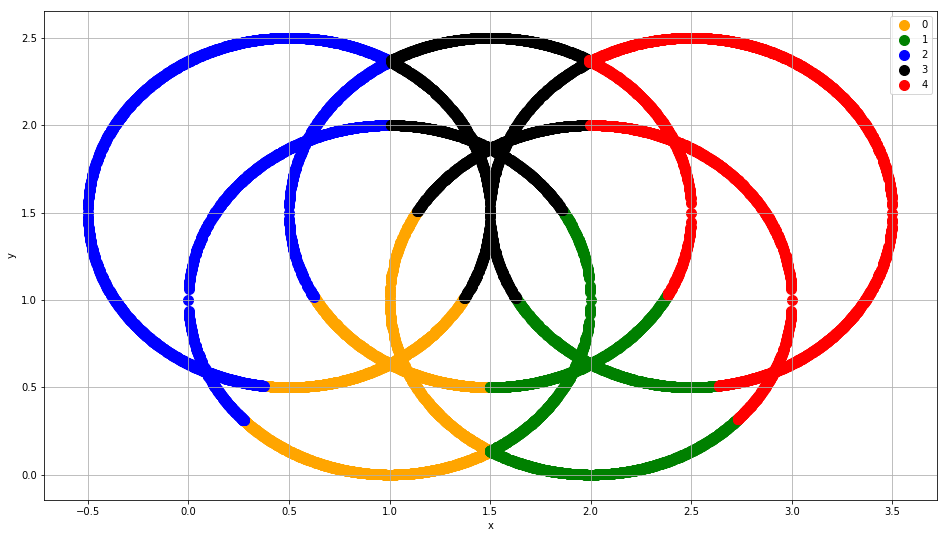

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

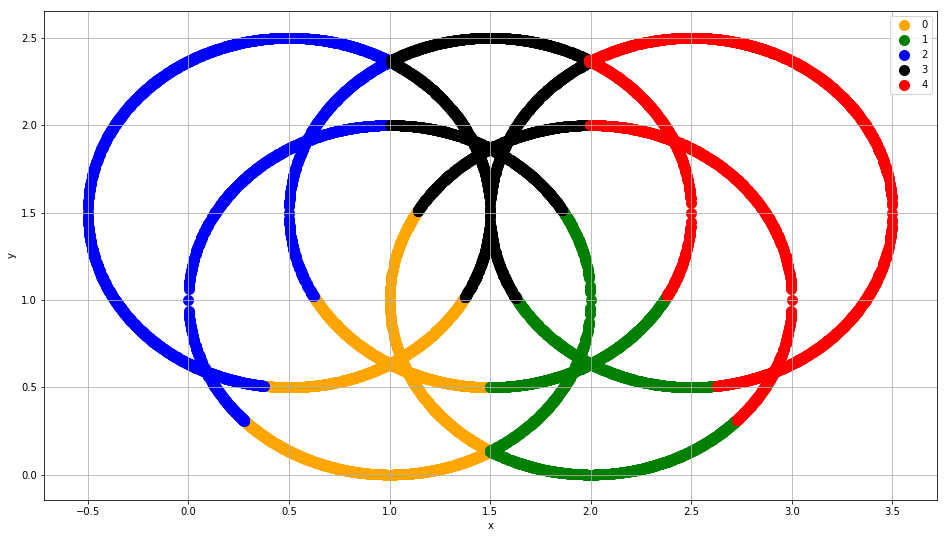

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

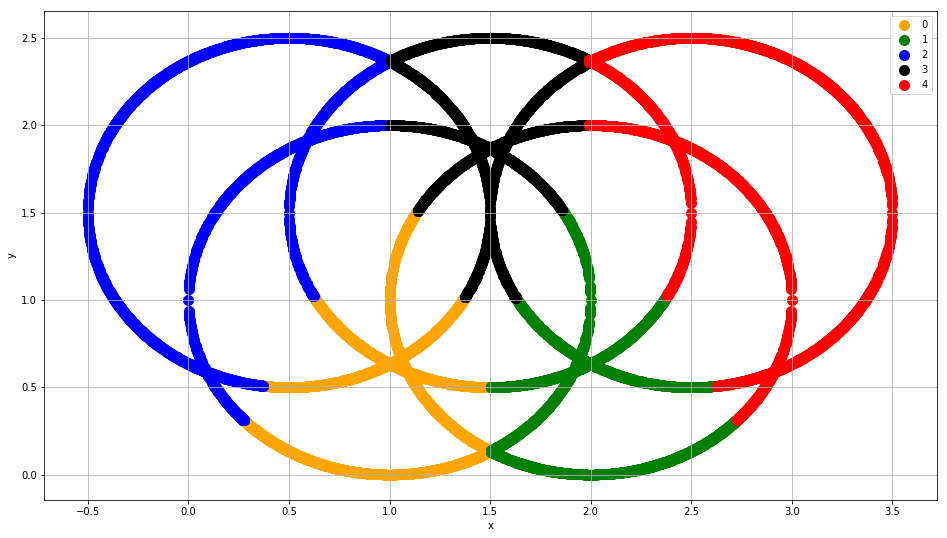

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

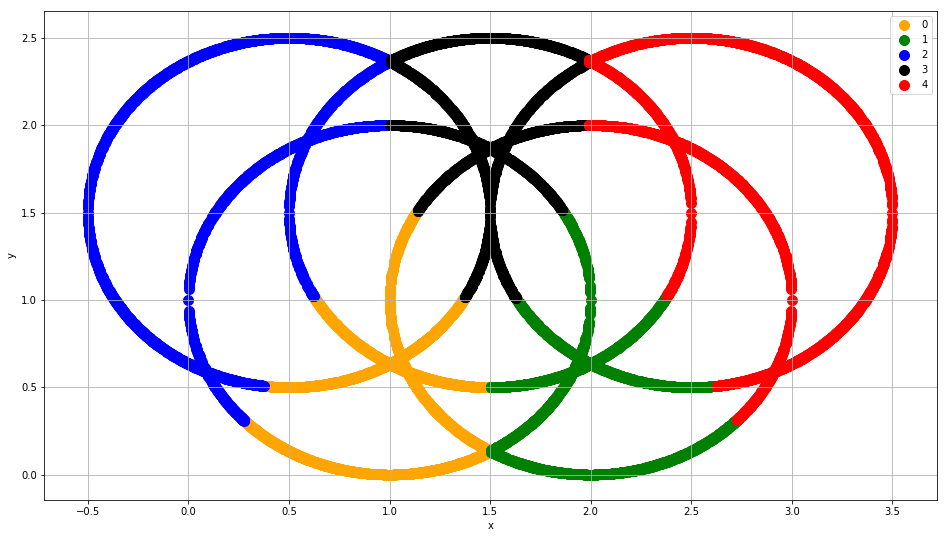

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

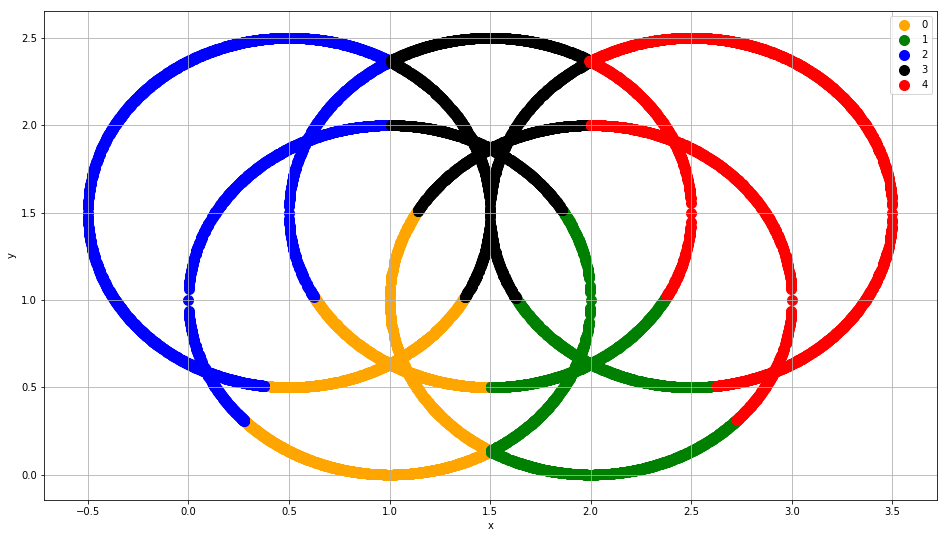

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

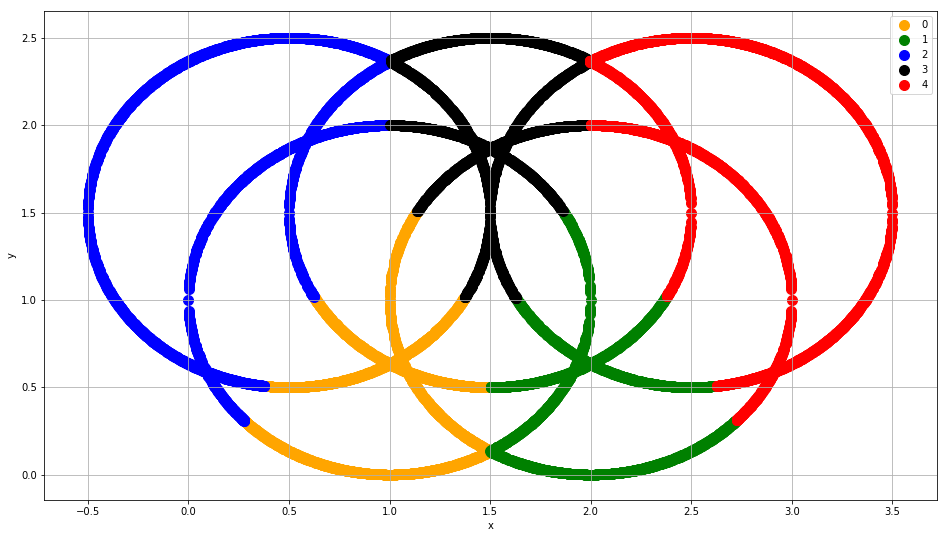

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

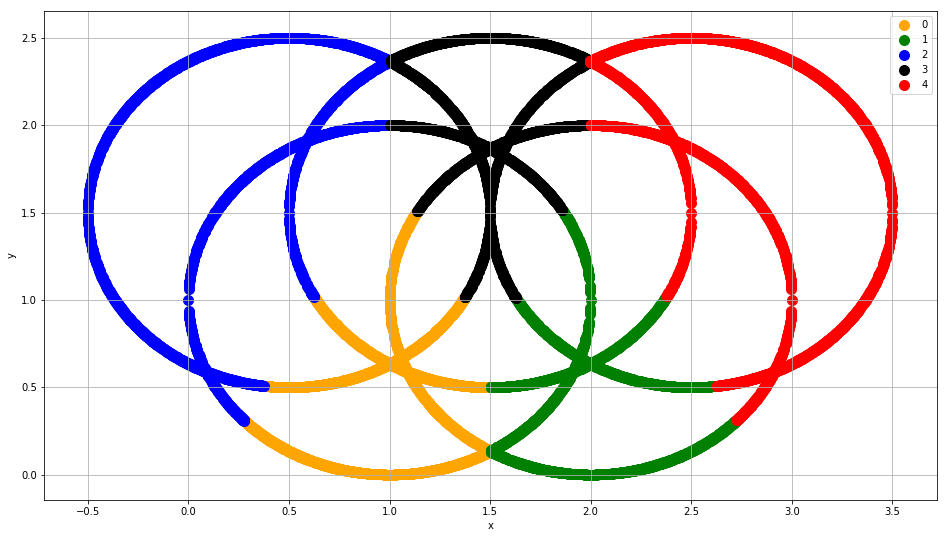

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

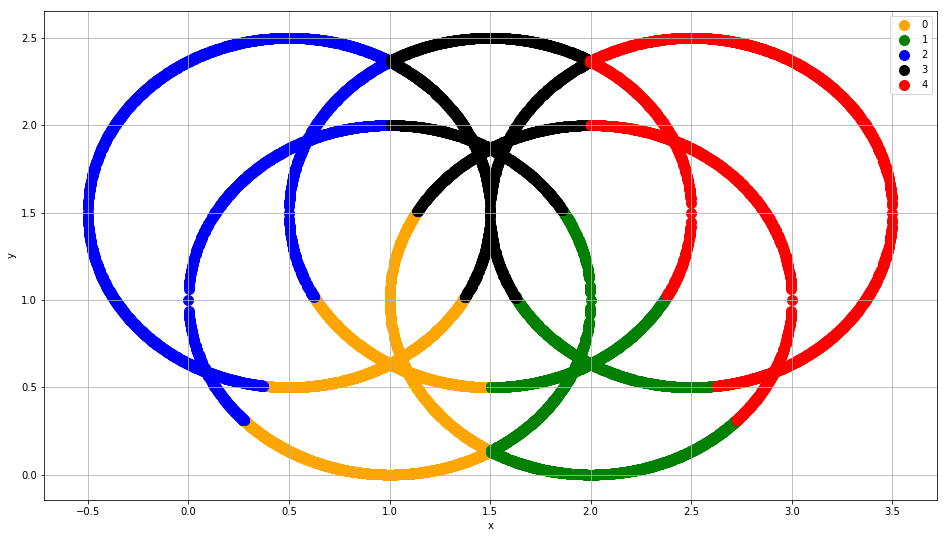

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

Optimization terminated successfully.
         Current function value: 1.117740
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.121662
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.123486
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.124171
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120047
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121597
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.125178
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.118814
         Iterations 8
      Number of Bootstraps:  90
    Misclassification Rate: 0.5880060
Root Average Squared Error: 0.5581981


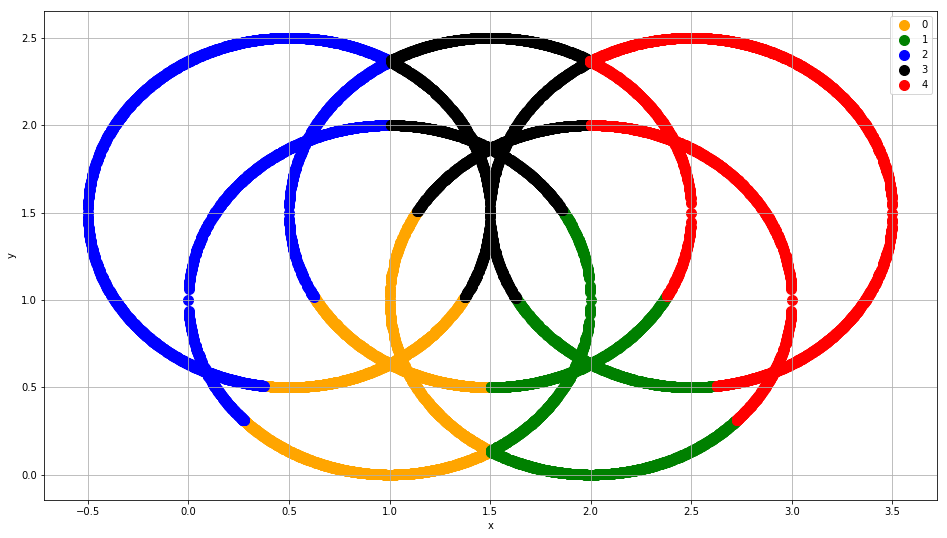

Optimization terminated successfully.
         Current function value: 1.116262
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.123903
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.116757
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.119003
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121494
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120571
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.115977
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117069
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.117955
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.120992
  

Optimization terminated successfully.
         Current function value: 1.117740
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.121662
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.123486
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.124171
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.120047
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.121597
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.125178
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.118814
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.127631
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.121732
  

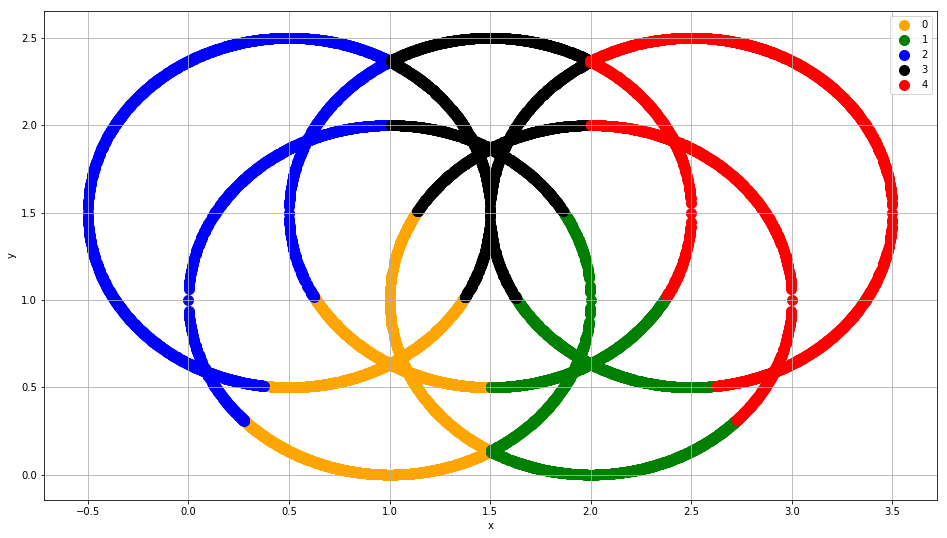

In [30]:
threshold=0.5
grouping=[]
grouping.append([0,0.5880,0.5582])
nB = [10,20,30,40,50,60,70,80,90,100]
for i in range(len(nB)):
    logPredProb = bootstrap_classMNLog (x, y, nB[i])
    RASE_log, MisClassRate_log,predClass = Model_metric (y,logPredProb, threshold)
    grouping.append([nB[i],MisClassRate_log,RASE_log])
    print('      Number of Bootstraps: ', nB[i])
    print('    Misclassification Rate: {:.7f}' .format(MisClassRate_log))
    print('Root Average Squared Error: {:.7f}' .format(RASE_log))
    drawing(df,predClass)
    



In [31]:
pd.DataFrame(grouping,columns=['No. of Bootstrap','Missclassification','RASE']).set_index('No. of Bootstrap')

,Missclassification,RASE
No. of Bootstrap,,
0,0.588000,0.558200
10,0.588256,0.558238
20,0.588256,0.558198
30,0.588206,0.558182
40,0.588206,0.558185
50,0.588206,0.558189
60,0.587906,0.558193
70,0.587906,0.558195
80,0.588006,0.558199


[[10, 11771, 0.5582381462395833],
 [20, 11771, 0.5581981533547856],
 [30, 11770, 0.5581823398547517],
 [40, 11770, 0.5581846079660414],
 [50, 11770, 0.5581888318710062],
 [60, 11764, 0.5581931896229728],
 [70, 11764, 0.5581948752808852],
 [80, 11766, 0.5581987242298784],
 [90, 11766, 0.5581981058068752],
 [100, 11767, 0.5581973060116984],
 [0, 0.588, 0.5582]]